Run Alteryx.help() for info about useful functions.
i.e., Alteryx.read("#1"), Alteryx.write(df,1), Alteryx.getWorkflowConstant("Engine.WorkflowDirectory")

In [ ]:
# List all non-standard packages to be imported by your 
# script here (only missing packages will be installed)
from ayx import Package
#Package.installPackages(['pandas','numpy'])

In [ ]:
from ayx import Alteryx

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = Alteryx.read("#1")

In [ ]:
df.shape

(1000, 13)

In [ ]:
df.columns

Index(['National Provider Identifier', 'Gender', 'Provider Type',
       'Count_HCPCS', 'Avg_payout_ratio', 'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed', 'Fraud_Label'],
      dtype='object')

In [ ]:
df[['Count_HCPCS', 'Avg_payout_ratio', 'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed']].describe()

,Count_HCPCS,Avg_payout_ratio,Avg_Allowance_ratio,Avg_Final_Amount_recevied,Avg_Number of Medicare Beneficiaries,Avg_Number of Medicare Beneficiary/Day Services,Sum_total_amount_claimed,Sum_Total_amount_paid,Sum_Total_Amount_allowed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.776000,0.393823,0.514332,16444.665179,59.825377,143.956857,2.150381e+05,6.726330e+04,8.817577e+04
std,10.708244,0.180880,0.225564,36618.285232,59.420566,284.757244,6.161804e+05,1.407561e+05,1.802760e+05
min,1.000000,0.061101,0.083662,0.000000,11.000000,11.000000,2.210000e+02,3.900000e+01,3.900000e+01
25%,2.750000,0.264422,0.345560,3169.522588,25.663043,41.306818,2.119350e+04,7.706595e+03,1.082769e+04
50%,5.000000,0.377186,0.493178,7222.044224,43.784091,76.196429,7.897572e+04,2.510460e+04,3.450152e+04
75%,11.000000,0.498634,0.649388,16122.998575,73.471344,145.186688,2.019165e+05,7.118210e+04,9.410048e+04
max,92.000000,1.000000,1.000000,500559.594184,755.857143,3721.250000,1.308796e+07,2.155988e+06,2.702010e+06


In [ ]:


# map values to 1 and 0
df['Fraud_Label'] = df['Fraud_Label'].replace({'Yes': 1, 'No': 0})



Column: Count_HCPCS
Skewness: 3.332112624712006
The distribution is highly right-skewed
Kurtosis: 15.540224902494042
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 1.0183235940248446e-40
The data is not normally distributed


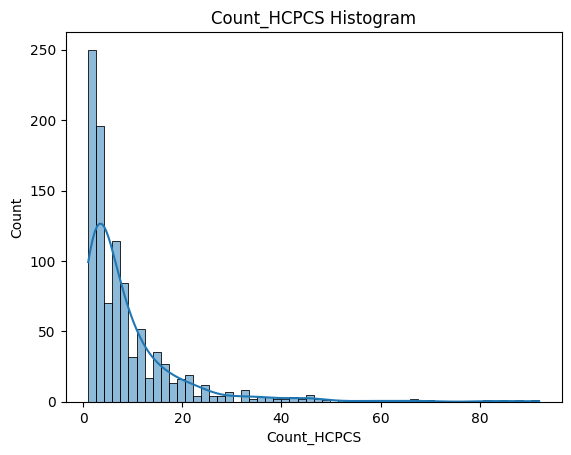

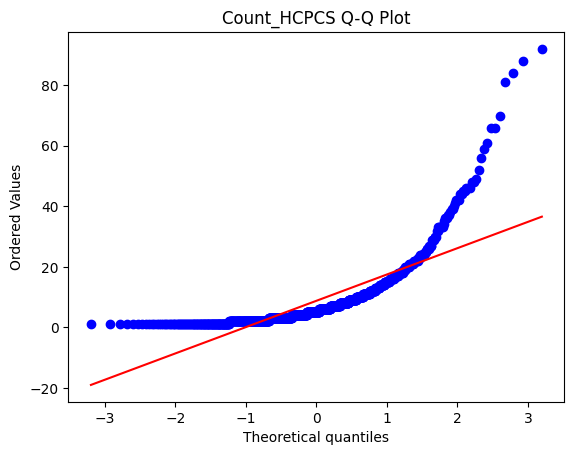


Column: Avg_payout_ratio
Skewness: 0.7159031058355508
The distribution is moderately right-skewed
Kurtosis: 0.6932629501340393
The distribution is approximately mesokurtic (normal)
Shapiro-Wilk test p-value: 1.585599768074309e-14
The data is not normally distributed


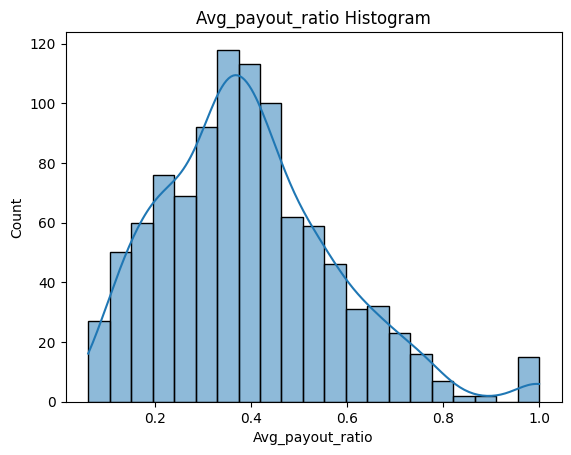

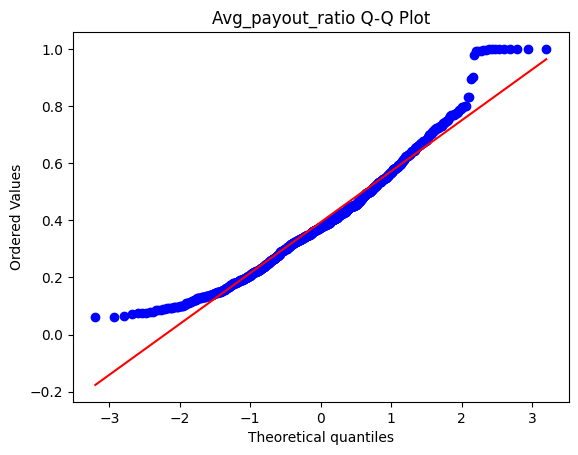


Column: Avg_Allowance_ratio
Skewness: 0.333417664603386
The distribution is approximately symmetric
Kurtosis: -0.5494814861282542
The distribution is approximately mesokurtic (normal)
Shapiro-Wilk test p-value: 5.008675765805215e-12
The data is not normally distributed


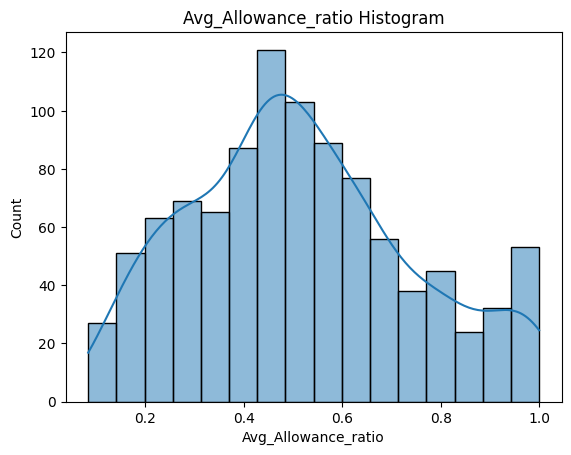

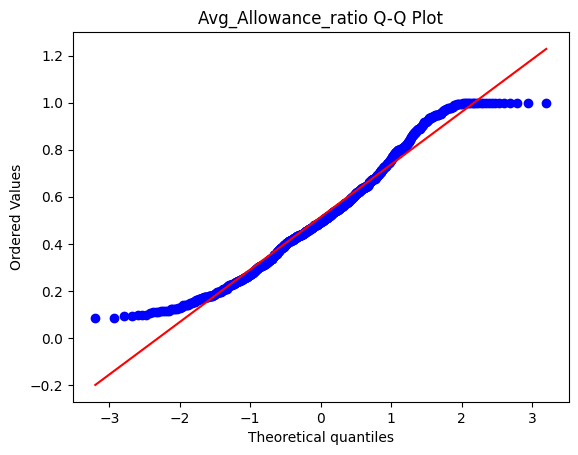


Column: Avg_Final_Amount_recevied
Skewness: 8.024640336217038
The distribution is highly right-skewed
Kurtosis: 82.93402402651303
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


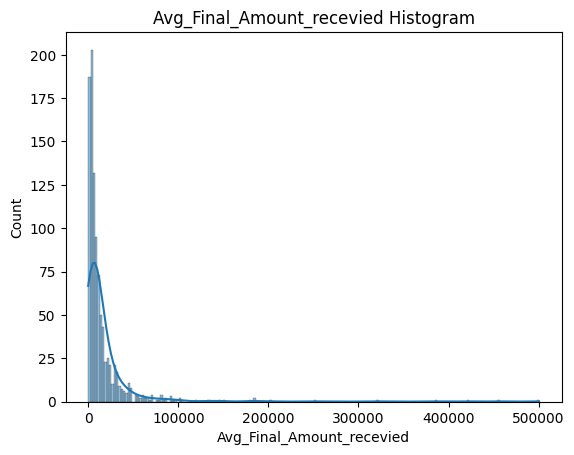

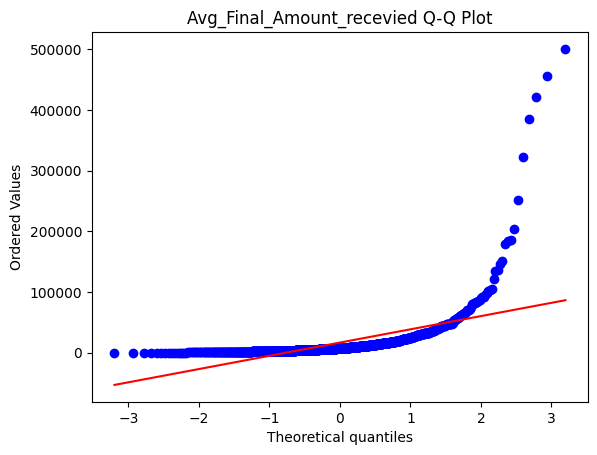


Column: Avg_Number of Medicare Beneficiaries
Skewness: 4.903196700861927
The distribution is highly right-skewed
Kurtosis: 42.00124286515312
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 1.1169750059133117e-41
The data is not normally distributed


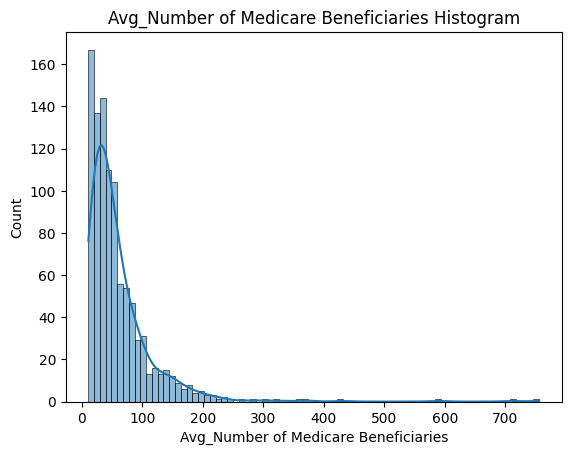

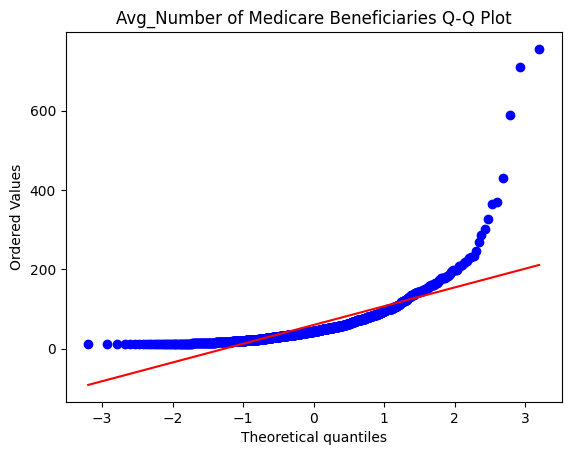


Column: Avg_Number of Medicare Beneficiary/Day Services
Skewness: 7.476916097970972
The distribution is highly right-skewed
Kurtosis: 71.11895719911658
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


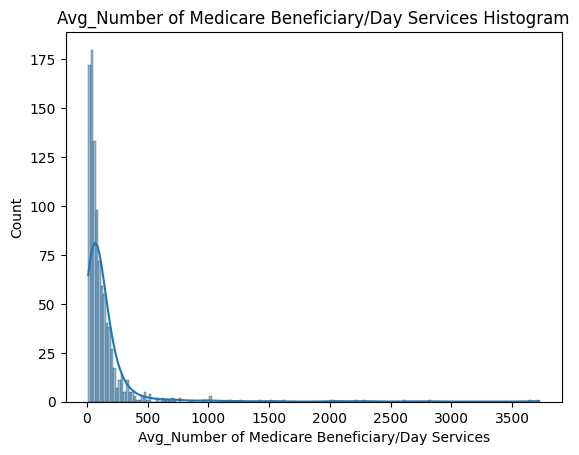

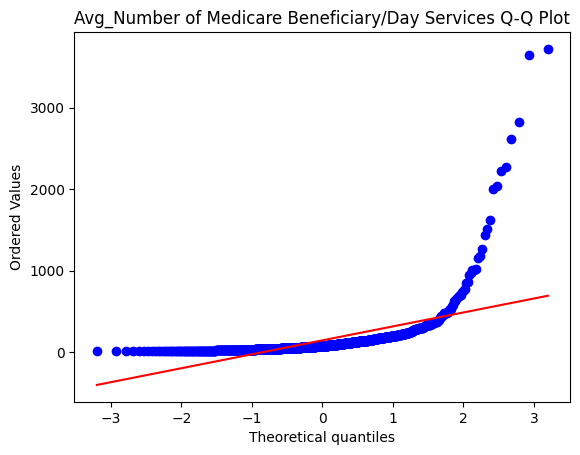


Column: Sum_total_amount_claimed
Skewness: 12.485884374417758
The distribution is highly right-skewed
Kurtosis: 216.5658377229839
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


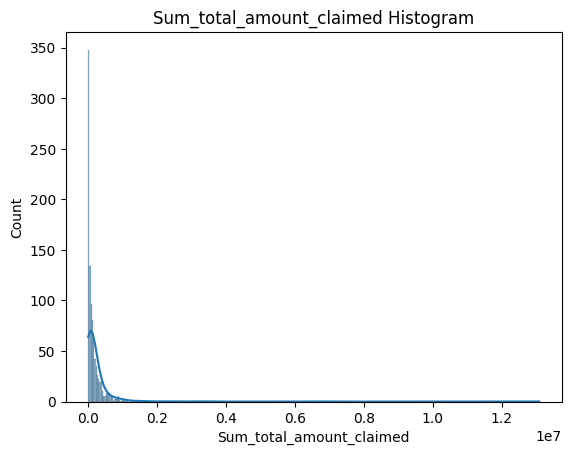

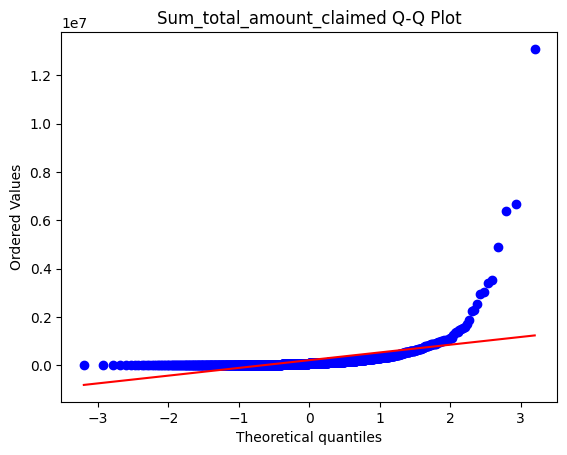


Column: Sum_Total_amount_paid
Skewness: 7.343742662836117
The distribution is highly right-skewed
Kurtosis: 82.58143900771745
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


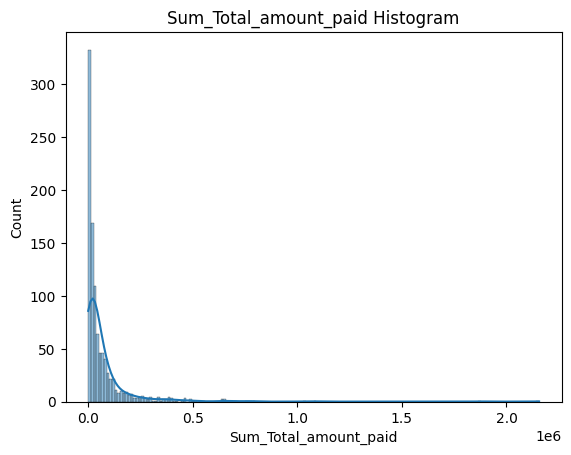

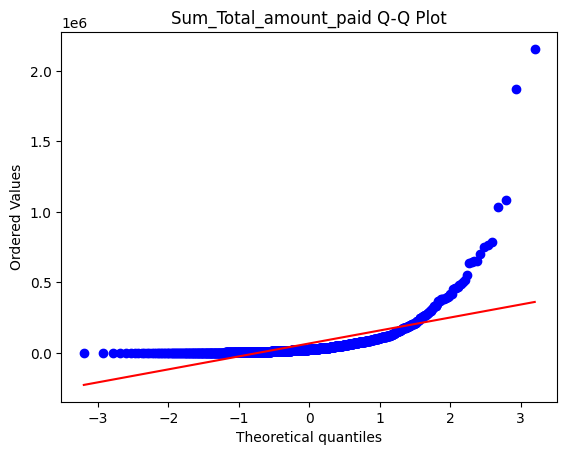


Column: Sum_Total_Amount_allowed
Skewness: 7.095681845501249
The distribution is highly right-skewed
Kurtosis: 77.37986496439925
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


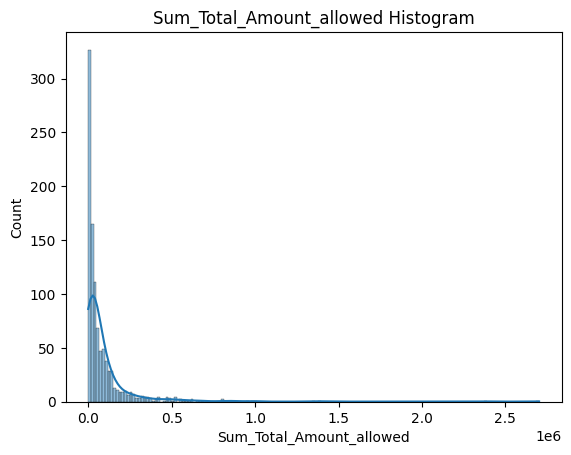

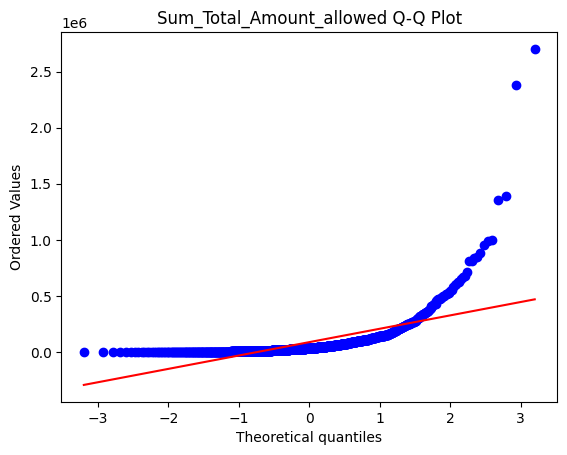

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load your dataset as a Pandas DataFrame
df_num = df[['Count_HCPCS', 'Avg_payout_ratio', 'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed']]

# Loop over each column in the DataFrame
for col in df_num.columns:
    # Calculate skewness and kurtosis
    skewness = skew(df_num[col])
    kurt = kurtosis(df_num[col])

    # Print the results
    print("Column:", col)
    print("Skewness:", skewness)
    if skewness < -1:
        print("The distribution is highly left-skewed")
    elif -1 <= skewness < -0.5:
        print("The distribution is moderately left-skewed")
    elif -0.5 <= skewness < 0.5:
        print("The distribution is approximately symmetric")
    elif 0.5 <= skewness < 1:
        print("The distribution is moderately right-skewed")
    else:
        print("The distribution is highly right-skewed")

    print("Kurtosis:", kurt)
    if kurt < -2:
        print("The distribution is highly platykurtic (flat)")
    elif -2 <= kurt < -1:
        print("The distribution is moderately platykurtic (flat)")
    elif -1 <= kurt < 1:
        print("The distribution is approximately mesokurtic (normal)")
    elif 1 <= kurt < 2:
        print("The distribution is moderately leptokurtic (peaked)")
    else:
        print("The distribution is highly leptokurtic (peaked)")

    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(df[col])
    print("Shapiro-Wilk test p-value:", p)
    if p > 0.05:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")
    
    # Create histogram
    sns.histplot(df[col], kde=True)
    plt.title(col + ' Histogram')
    plt.show()
    
    # Create Q-Q plot
    fig, ax = plt.subplots()
    stats.probplot(df[col], plot=ax)
    ax.set_title(col + ' Q-Q Plot')
    plt.show()
    
    print()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



variables = ['Count_HCPCS',  'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Fraud_Label']


selected_data = df[variables]


corr_matrix = selected_data.corr()


p_values = np.zeros_like(corr_matrix)
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        corr, p_val = pearsonr(selected_data[variables[i]], selected_data[variables[j]])
        p_values[i, j] = p_val

p_values[p_values == 0] = np.nan


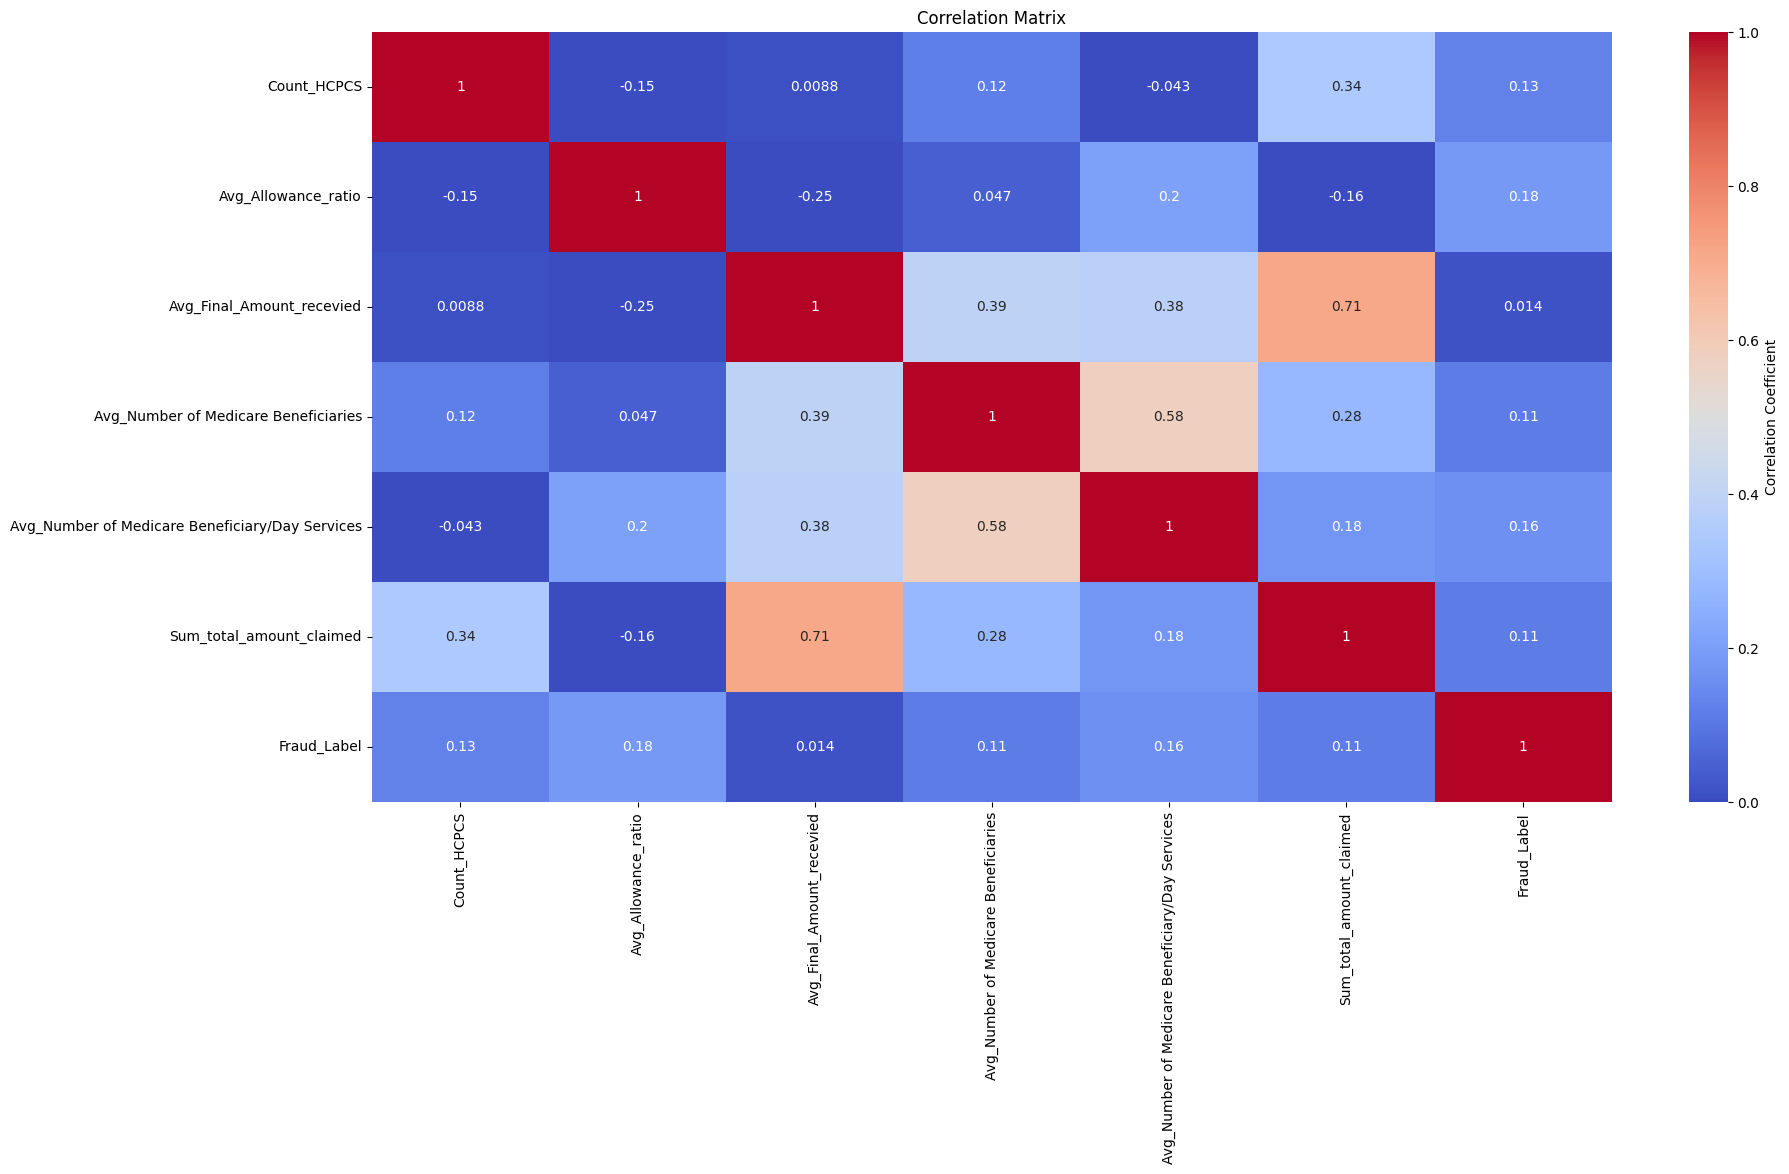

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, center=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()


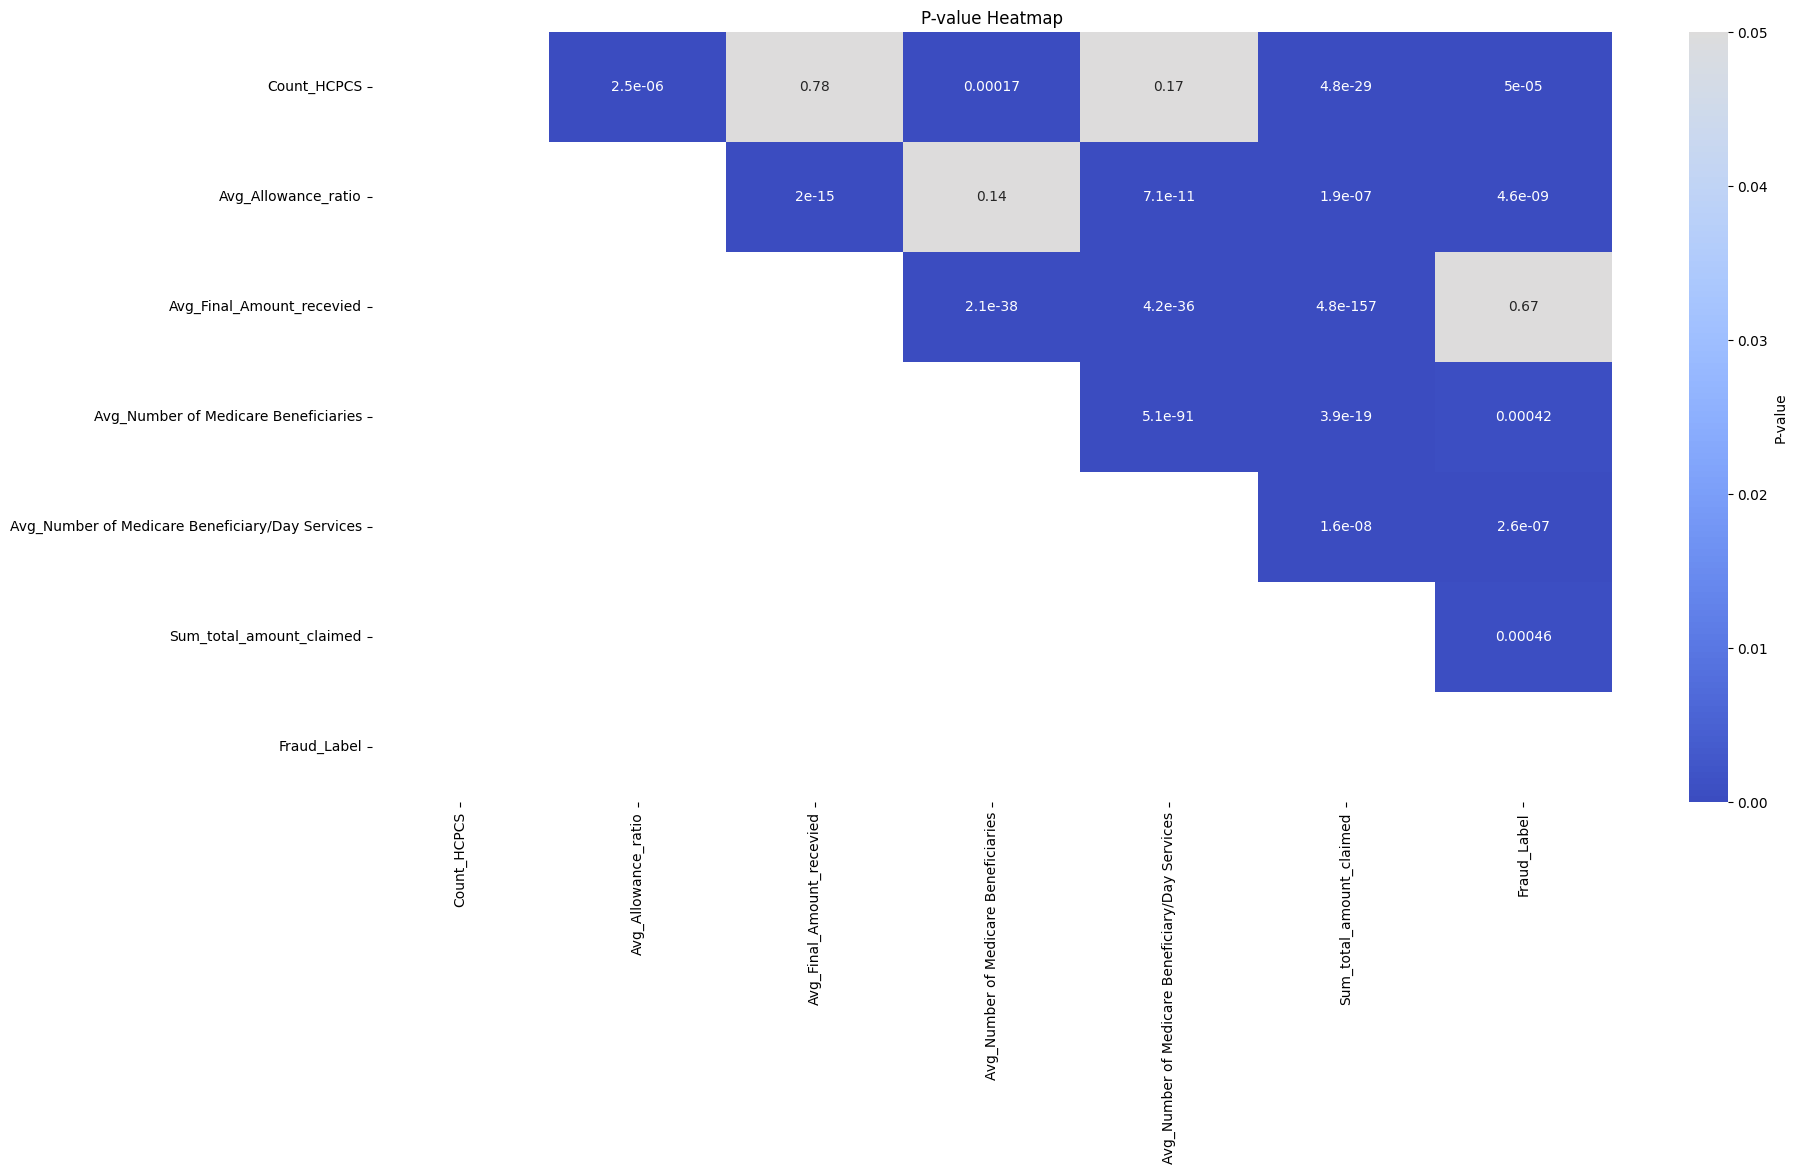

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(p_values, annot=True, cmap='coolwarm', vmin=0, vmax=0.05, center=0.05,
            xticklabels=variables, yticklabels=variables,
            cbar_kws={'label': 'P-value'})
plt.title('P-value Heatmap')
plt.show()

In [ ]:
df.columns

Index(['National Provider Identifier', 'Gender', 'Provider Type',
       'Count_HCPCS', 'Avg_payout_ratio', 'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed', 'Fraud_Label'],
      dtype='object')

In [ ]:
df[['Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed']].describe()

,Sum_total_amount_claimed,Sum_Total_amount_paid,Sum_Total_Amount_allowed
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.150381e+05,6.726330e+04,8.817577e+04
std,6.161804e+05,1.407561e+05,1.802760e+05
min,2.210000e+02,3.900000e+01,3.900000e+01
25%,2.119350e+04,7.706595e+03,1.082769e+04
50%,7.897572e+04,2.510460e+04,3.450152e+04
75%,2.019165e+05,7.118210e+04,9.410048e+04
max,1.308796e+07,2.155988e+06,2.702010e+06


In [ ]:
df1 = df[['Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed']]

In [ ]:
import pandas as pd
import numpy as np



# apply ln transformation to entire dataframe
df1 = df1.applymap(lambda x: np.log(x))



In [ ]:
df1.describe()

,Sum_total_amount_claimed,Sum_Total_amount_paid,Sum_Total_Amount_allowed
count,1000.000000,1000.000000,1000.000000
mean,11.073121,10.014050,10.302535
std,1.674466,1.622200,1.619013
min,5.398163,3.663562,3.663562
25%,9.961442,8.949831,9.289855
50%,11.276896,10.130800,10.448729
75%,12.215609,11.172995,11.452113
max,16.387203,14.583759,14.809506


In [ ]:
X = df1
Y = df[['Fraud_Label']]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X)

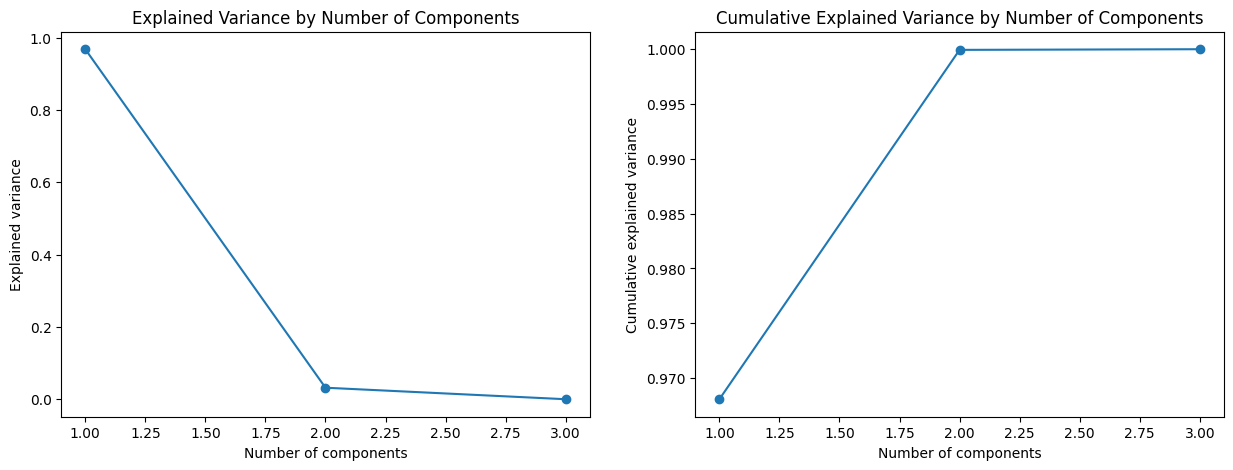

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot explained variance
ax[0].plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Explained variance')
ax[0].set_title('Explained Variance by Number of Components')

# plot cumulative explained variance
ax[1].plot(range(1, len(pca.explained_variance_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('Cumulative explained variance')
ax[1].set_title('Cumulative Explained Variance by Number of Components')

plt.show()


In [ ]:
# Select the number of components that explain at least 80-90% of the variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f'Number of components to explain 80% of variance: {n_components}')


Number of components to explain 80% of variance: 1


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


# Get the loadings for each variable
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

print(loadings)


                               PC1       PC2       PC3
Sum_total_amount_claimed  0.951193  0.308573  0.003935
Sum_Total_amount_paid     0.190659 -0.577595 -0.793746
Sum_Total_Amount_allowed  0.242656 -0.755756  0.608236


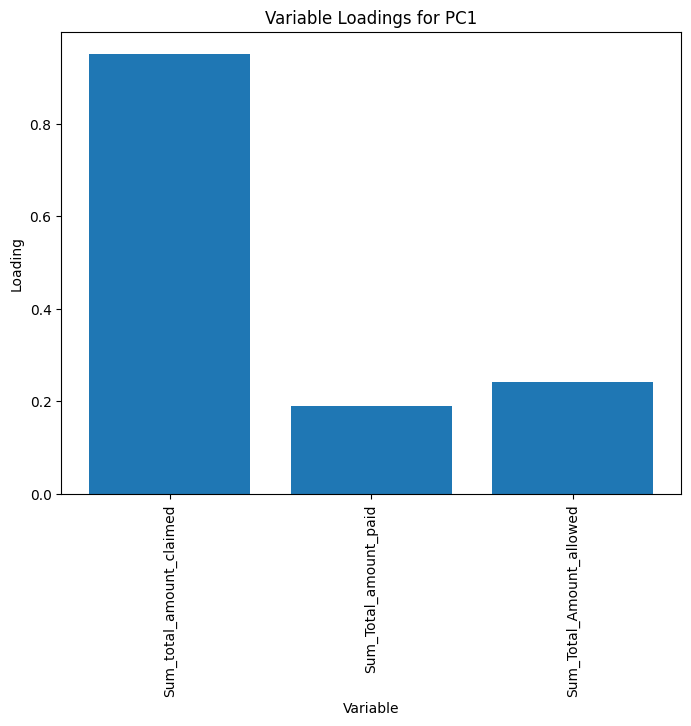

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Get the loadings for each variable
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Get the loadings for the first principal component
loadings_pc1 = loadings['PC1']

# Plot the variable loadings for the first principal component
plt.figure(figsize=(8, 6))
plt.bar(x=loadings_pc1.index, height=loadings_pc1.values)
plt.xticks(rotation=90)
plt.title('Variable Loadings for PC1')
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.show()


In [ ]:
df2 = df[['Avg_payout_ratio', 'Avg_Allowance_ratio']]

In [ ]:
df2.describe()

,Avg_payout_ratio,Avg_Allowance_ratio
count,1000.000000,1000.000000
mean,0.393823,0.514332
std,0.180880,0.225564
min,0.061101,0.083662
25%,0.264422,0.345560
50%,0.377186,0.493178
75%,0.498634,0.649388
max,1.000000,1.000000


In [ ]:
X = df2
Y = df[['Fraud_Label']]

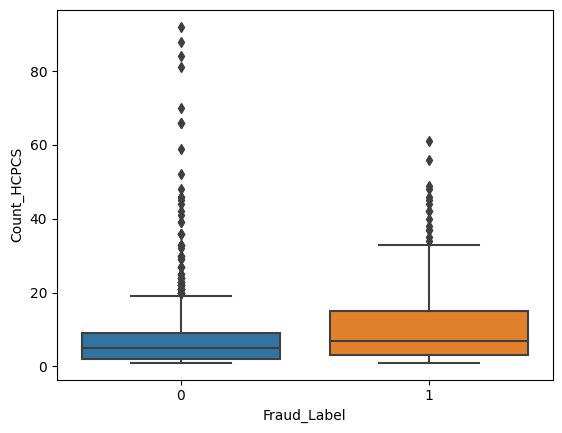

In [ ]:
target = 'Fraud_Label'
independent_vars = ['FreqGoProvider', 'GeneralHealth', 'TimesModerateExercise', 'tech savvy', 'health complexity']

# Loop over the independent variables and create scatter plots
for var in independent_vars:
    sns.boxplot(x=df[target], y=df[var])
    plt.xlabel(target)
    plt.ylabel(var)
    plt.show()

In [ ]:
df['Gender']

0        M
1        M
2        M
3        F
4        F
      ... 
995      F
996      M
997      M
998      F
999    NaN
Name: Gender, Length: 1000, dtype: object

In [ ]:
df.columns

Index(['National Provider Identifier', 'Gender', 'Provider Type',
       'Count_HCPCS', 'Avg_payout_ratio', 'Avg_Allowance_ratio',
       'Avg_Final_Amount_recevied', 'Avg_Number of Medicare Beneficiaries',
       'Avg_Number of Medicare Beneficiary/Day Services',
       'Sum_total_amount_claimed', 'Sum_Total_amount_paid',
       'Sum_Total_Amount_allowed', 'Fraud_Label'],
      dtype='object')

In [ ]:


# map values to 1 and 0
df['Gender'] = df['Gender'].replace({'F': 1, 'M': 0})



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df[[ 'Count_HCPCS', 'Avg_Allowance_ratio', 'Avg_Number of Medicare Beneficiary/Day Services','Sum_total_amount_claimed' ]]
Y = df[['Fraud_Label']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



# create a gradient boosting classifier object
gb_classifier = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0)

# fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# predict using the trained classifier
y_pred = gb_classifier.predict(X_test)

# calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Accuracy: 0.7966666666666666
Precision: 0.5135135135135135
Recall: 0.3064516129032258
F1 Score: 0.3838383838383838
ROC AUC Score: 0.6154106804011927
